# Introduction to Data Viz with Python (Part I)

by [Al Rey Villagracia](https://github.com/villagraciaa)

---

In this two-part session, we explore Python’s plotting library, matplotlib. According to its official site, it’s “a comprehensive library for creating static, animated, and interactive visualizations in Python.” We'll walk through some of the key components of a matplotlib figure, which I believe are essential for building a solid foundation before diving into more advanced customization techniques.

In Part II, we’ll also introduce seaborn and plotly as additional visualization tools.

Note: If you're brand new to Python and/or matplotlib, it might be helpful to have someone experienced guide you through this notebook—especially since it’s intended to be paired with a lecture.

---

**Let's Begin**

First, let's import the libraries. We are already importing `seaborn as sns` as early as now because we will be using some of the datasets in its online repository.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

For those new to Python and Jupyter, `%matplotlib` is what we call a magic function in IPython. *Magics* "_are useful as convenient functions where Python syntax is not the most natural one, or when one want to embed invalid python syntax in their work flow_". `%matplotlib inline` "_sets the backend of matplotlib to the 'inline' backend_"; in other words, it allows us, well, to show matplotlib figures inline within the notebooks.

### Load Data

Below, let's load our data from the `seaborn` repository. The first dataset we'll use is [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet). It's a classic example many of us use to show the importance of visualizing your data even at the exploratory level, and that the summary statistics, especially those presented as single values, are insufficient to make conclusions about certain systems.

In [2]:
df_ans = sns.load_dataset('anscombe')
df_ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [3]:
df_ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


## Plotting with matplotlib

There are at least two ways to build vizzes using **matplotlib** based on its two APIs:

1. `pyplot` interface
2. Object-oriented interface (OOI)

The object-oriented API is used for more complex plotting as we will show later; and, the other is through the `pyplot` interface, which is a scripting layer that's state-based. "State-based" means that it takes note of the current `Figure` and the `Axes` objects defined. That is, all changes you implement on a figure will only be implemented a figure (`Axes`) at a time. This can be a bit confusing, but it will get clearer as we move forward with concrete examples. **[pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)**, among its other purposes, is intended to "feel" like MATLAB and is mainly used for much simpler visualizations (i.e., less customizability). You may find **pyplot** easier to use compared to **matplotlib**'s OOI, but the latter, as mentioned, is much more powerful. This latter creates and utilizes an `Axes` object. Again, this idea will be much clearer once we dissect a matplotlib figure.

But before we deep dive, here's a quick way to plot with `pyplot` as `plt`.

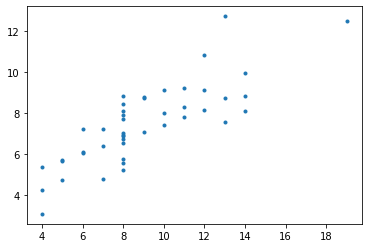

In [4]:
## The '.' in the argument indicates the marker style
plt.plot(df_ans.x, df_ans.y, '.');

### Basic plot elements
Before we dive into the **matplotlib objects**, let's have a look first at some of the basic plot elements:

- `xlabel` - add x-axis label
- `ylabel` - add y-axis label
- `xlim` - set x-limits of the x-axis
- `ylim` - set y-limits of the y-axis
- `legend` - add legend

Another thing that we need to know is that the default style of a plot is actually a line. That is, if you draw a datapoint, it will not appear (_since there is no line_) unless you explicitly set the marker style to something visible using `'.'` as illustrated below or other marker styles like `'^'` or `'o'`. Check more markers [here](https://matplotlib.org/stable/api/markers_api.html).

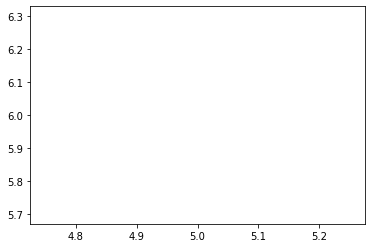

In [5]:
plt.plot(5, 6);

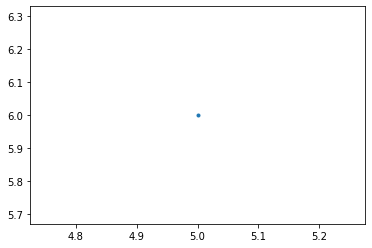

In [6]:
## Adding the marker '.'
plt.plot(5, 6, '.');

Now, let's make use of the Anscombe's Quartet dataset.

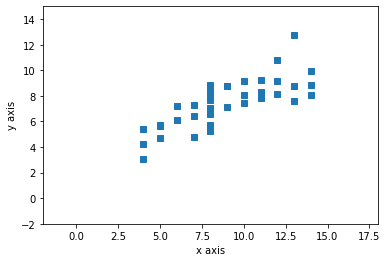

In [7]:
## 's' stands for square marker
plt.plot(df_ans.x, df_ans.y, 's');
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.xlim(-2,18)
plt.ylim(-2,15);

We can also change the colors using special **matplotlib** color abbreviations. **matplotlib** also has a list of other [named colors](https://matplotlib.org/stable/gallery/color/named_colors.html) like "rebeccapurple". Of course, you may also use [hex codes](https://htmlcolorcodes.com/).

Below, we show a trick that `pyplot` allows us to do, which is to define color abbreviations with a marker, e.g., `'ro'` stands for red and circle marker, `'bs'` will give us blue square markers.

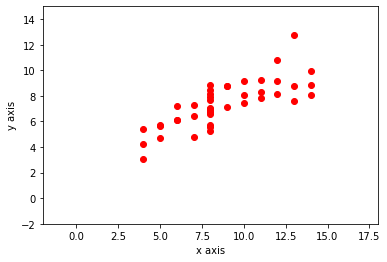

In [8]:
## Here we're using circle for markers
## We're also coloring the datapoints red
plt.plot(df_ans.x, df_ans.y, 'ro');
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.xlim(-2,18)
plt.ylim(-2,15);

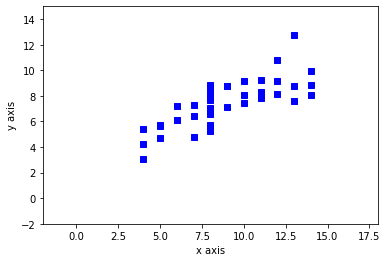

In [9]:
## Here we're using sqaure for markers
## We're also coloring the datapoints blue
plt.plot(df_ans.x, df_ans.y, 'bs');
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.xlim(-2,18)
plt.ylim(-2,15);

However, if we want to use other colors (other than the abbreviations), we need to define separately from the marker syle.

Notice as well the `linestyle` argument that we have defined as empty. See what happens if you remove that argument.

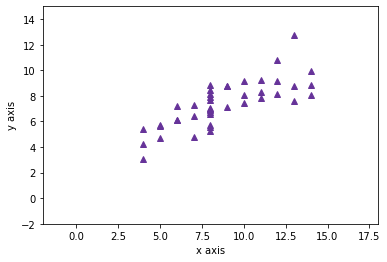

In [10]:
## Here we're using triangle for markers
## We're also coloring the datapoints rebecca purple
plt.plot(df_ans.x, df_ans.y, color='rebeccapurple',
         marker='^', linestyle='');
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.xlim(-2,18)
plt.ylim(-2,15);

What are the other linestyles?

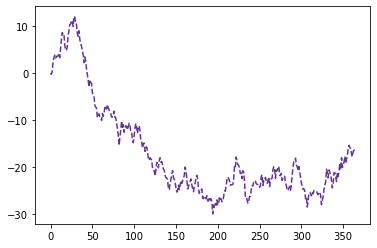

In [11]:
## Let's generate a random dataset we call "y"
y = np.random.randn(365).cumsum()
plt.plot(y, color='rebeccapurple', linestyle='--');

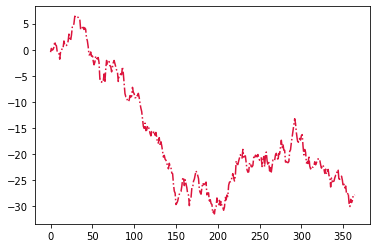

In [12]:
y = np.random.randn(365).cumsum()
plt.plot(y, color='crimson', linestyle='-.');

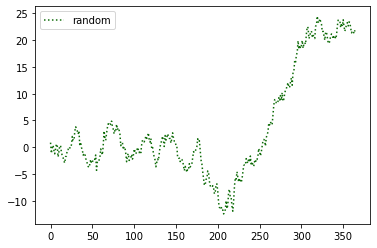

In [13]:
y = np.random.randn(365).cumsum()
plt.plot(y, color='#0F6C09', linestyle=':', label='random');
plt.legend();

### The Object-Oriented interface

So far, we have been using the `pyplot` interface which has allowed us to change colors, marker styles, and line styles; we also were able to add axis labels and set axes limits. But what if, for example, we want to perform more modifications on our plots? Say, we want a bigger canvas? Or, what if we want to remove the borders of the plot, and more? Or, if we want subplots and grids?

To do this, we need to have to use **matplotlib**'s more powerful object-oriented interface. Here, we formally introduce the `Figure` and `Axes` objects.

#### The matplotlib Figure( ) instance
In the image below, we look at the different parts of a `matplotlib` figure [[1](https://matplotlib.org/1.5.3/faq/usage_faq.html)]. Here, we have the `Figure` instance, a figure "child" called the `Axes` and the different components of `Axes` that can also be called as `Axes`'s children. A figure can contain many children `Axes`, but a given `Axes` object can only be in one `Figure`. `Axes` are members of the <font color='blue'>*artists*</font> group, which also include `Figure`, `title`, `x-label`, `y-label`, the `lines`, etc.

<img src="https://user-images.githubusercontent.com/12478436/118991771-97638400-b9b6-11eb-882d-61da70cb65db.png" title="canvas" width=550>


Below is another diagram highlighting the different parts of a figure [[1](https://matplotlib.org/faq/usage_faq.html)]. It would be easier to think that a **matplotlib** figure's composed of **encodings**, and that encoding is editable.


<img src="https://user-images.githubusercontent.com/12478436/118991902-b95d0680-b9b6-11eb-907f-0c604f0039c1.png" title="anatomy" width=650>


### Plotting with OOI

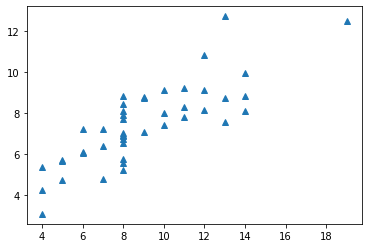

In [14]:
## Still using pyplot
plt.plot(df_ans.x,df_ans.y, '^');

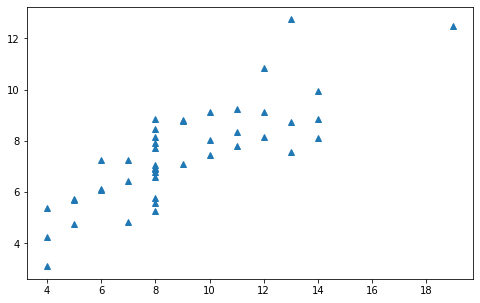

In [15]:
## Here, we explicitly use both Figure and Axes objects
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(df_ans.x,df_ans.y, '^');

The `plt.subplots( )` allows us to create a figure (`fig`) and a set of subplots (stored in `ax`). For the specific example above, the "set of subplots" contains only one plot or, more technically, one `Axes`.

#### Axes Children
Let's check the components of our `Axes` object.

In [16]:
ax.get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

Let's specify the axes limits of the `Axes` object.

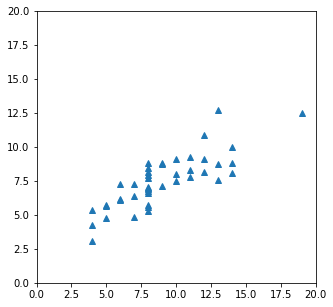

In [17]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(df_ans.x,df_ans.y, '^');
ax.axis([0,20,0,20]);

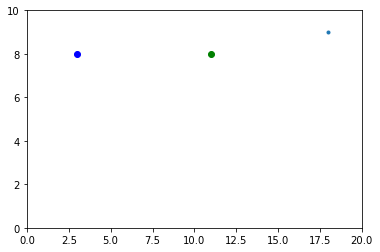

In [18]:
fig, ax = plt.subplots(1)
ax.plot(18, 9, '.');
ax.plot(11, 8, 'go')
ax.plot(3, 8, 'bo')
ax.axis([0,20,0,10]);

In [19]:
ax.get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

So far, we haven't really shown yet how the OOI approach is more powerful than the `pyplot` interface. But below, we show what else we can do using OOI.

In this example, we initially use the `pyplot` interface. And then, we ge the current `Axes` with the `plt.gca()` command. We then store the results in `ax`, which, for this particular example, contains one `Axes`. Using `ax`, we can make some more modifications like removing the top and right spines of our figure (or `Axes` object).

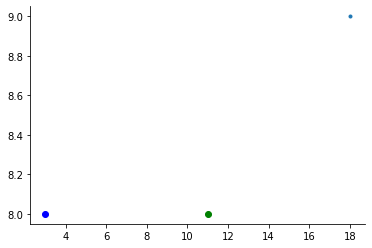

In [20]:
plt.plot(18, 9, '.');
plt.plot(11, 8, 'go');
plt.plot(3, 8, 'bo');
ax = plt.gca();

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True);

Below, we are generating this same plot, but we're using OOI at the onset by using `fig, ax = plt.subplots(1)`.

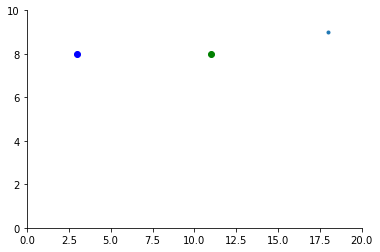

In [21]:
fig, ax = plt.subplots(1)
ax.plot(18, 9, '.');
ax.plot(11, 8, 'go')
ax.plot(3, 8, 'bo')
ax.axis([0,20,0,10]);

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True);

### Scatter Plots
It was mentioned earlier that `plot` actually refers to a line plot. If we really want scatter plots, **matplotlib** has a function that generates those.

In [22]:
df_ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


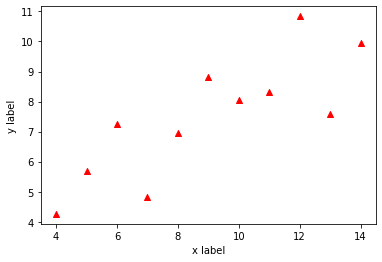

In [23]:
fig, ax = plt.subplots(1);

# Plotting x and y for dataset group I
ax.scatter(df_ans[df_ans.dataset=='I']['x'],
           df_ans[df_ans.dataset=='I']['y'],
           c = 'r', marker='^');

ax.set_xlabel('x label');
ax.set_ylabel('y label');

#### Setting colors

In [24]:
kulay = ['red']* 9 + ['blue'] * 2
kulay

['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue']

In [25]:
df_ans[df_ans.dataset=='I']

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


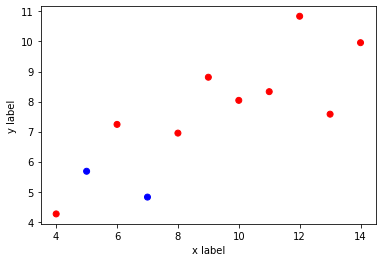

In [26]:
fig, ax = plt.subplots(1);
x = df_ans[df_ans.dataset=='I']['x']
y = df_ans[df_ans.dataset=='I']['y']

ax.scatter(x, y, c = kulay);
ax.set_xlabel('x label');
ax.set_ylabel('y label');

Okay, that's a very crude way dealing with colors on matplotlib. We'll cover more on colors later in this notebook.

#### Grouping and Adding Legends

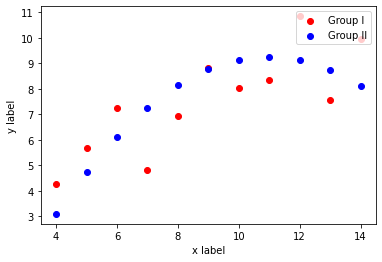

In [27]:
fig, ax = plt.subplots(1)

x1 = df_ans[df_ans.dataset=='I']['x']
y1 = df_ans[df_ans.dataset=='I']['y']
x2 = df_ans[df_ans.dataset=='II']['x']
y2 = df_ans[df_ans.dataset=='II']['y']

ax.scatter(x1, y1, c = 'r', label = 'Group I');
ax.scatter(x2, y2, c = 'b', label = 'Group II');

ax.set_xlabel('x label');
ax.set_ylabel('y label');

ax.legend(loc=1);

What if you want the legend placed outside of the plot as shown below, you can just use the `bbox_to_anchor` argument.

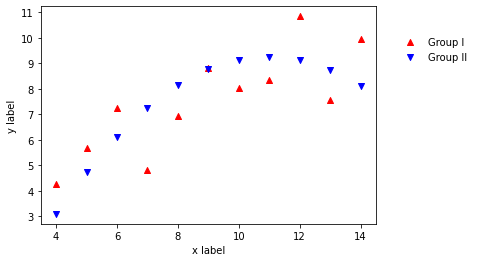

In [28]:
fig, ax = plt.subplots(1)

x1 = df_ans[df_ans.dataset=='I']['x']
y1 = df_ans[df_ans.dataset=='I']['y']
x2 = df_ans[df_ans.dataset=='II']['x']
y2 = df_ans[df_ans.dataset=='II']['y']

ax.scatter(x1, y1, c = 'r', marker = '^', label = 'Group I');
ax.scatter(x2, y2, c = 'b', marker = 'v', label = 'Group II');

ax.set_xlabel('x label');
ax.set_ylabel('y label');

ax.legend(bbox_to_anchor=(1.3, .9), frameon=False);

#### Annotating
Of course, we can also annotate our figures.

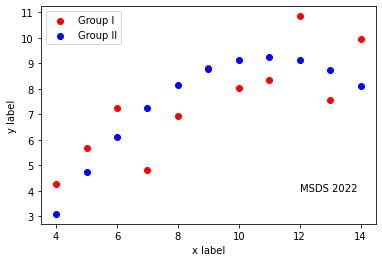

In [29]:
fig, ax = plt.subplots(1);

x1 = df_ans[df_ans.dataset=='I']['x']
y1 = df_ans[df_ans.dataset=='I']['y']
x2 = df_ans[df_ans.dataset=='II']['x']
y2 = df_ans[df_ans.dataset=='II']['y']

ax.scatter(x1, y1, c = 'r', label = 'Group I');
ax.scatter(x2, y2, c = 'b', label = 'Group II');

ax.set_xlabel('x label');
ax.set_ylabel('y label');

ax.text(12, 4, 'MSDS 2022', size = 10);
ax.legend();

In [30]:
ax.get_children()

 Text(12, 4, 'MSDS 2022'),
 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

### Subplots

Althought using `pyplot` seems easier, identifying the axes will come in handy once we deal with subplots or multiple plots in a figure.

So far, we have just been drawing a `Figure` with only one `Axes`. But as mentioned above, `plt.subplots` allows us to actually draw a set of `Axes`. In the example below, we are making "space" for two `Axes`; `plt.subplots(1,2)` says that we draw two `Axes` using the layout `plt.subplots(nrows=1, ncols=2)`.

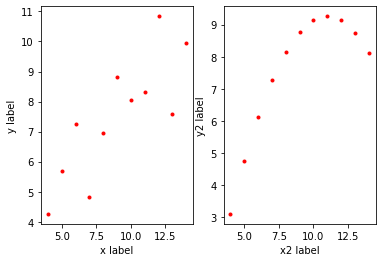

In [31]:
fig, ax = plt.subplots(1,2)

# First Axes
ax[0].plot(df_ans[df_ans.dataset=='I']['x'],
           df_ans[df_ans.dataset=='I']['y'],'r.');
ax[0].set_xlabel('x label')
ax[0].set_ylabel('y label')

# Second Axes
ax[1].plot(df_ans[df_ans.dataset=='II']['x'],
           df_ans[df_ans.dataset=='II']['y'],'r.');
ax[1].set_xlabel('x2 label');
ax[1].set_ylabel('y2 label');

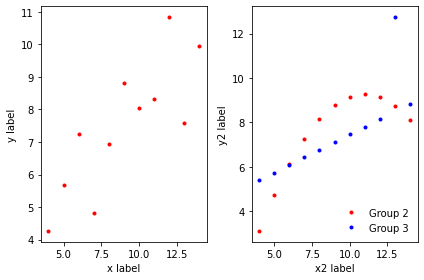

In [32]:
fig, ax = plt.subplots(1,2)

# First Axes
ax[0].plot(df_ans[df_ans.dataset=='I']['x'],
           df_ans[df_ans.dataset=='I']['y'],'r.');
ax[0].set_xlabel('x label')
ax[0].set_ylabel('y label')

# Second Axes
ax[1].plot(df_ans[df_ans.dataset=='II']['x'],
           df_ans[df_ans.dataset=='II']['y'],'r.', label='Group 2');
ax[1].set_xlabel('x2 label');
ax[1].set_ylabel('y2 label');
ax[1].plot(df_ans[df_ans.dataset=='III']['x'],
         df_ans[df_ans.dataset=='III']["y"], 'b.', label='Group 3');
ax[1].legend(loc=4,frameon = False);

plt.tight_layout()

But what if the `Axes` objects actually have the same y-axis? Can they share axes? Short answer, yes.

To learn more about the sharing of axes, [read more here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).

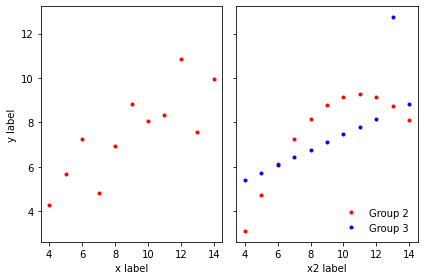

In [33]:
fig, ax = plt.subplots(1,2, sharey=True)

# First Axes
ax[0].plot(df_ans[df_ans.dataset=='I']['x'],
           df_ans[df_ans.dataset=='I']['y'],'r.');
ax[0].set_xlabel('x label')
ax[0].set_ylabel('y label')

# Second Axes
ax[1].plot(df_ans[df_ans.dataset=='II']['x'],
           df_ans[df_ans.dataset=='II']['y'],'r.', label='Group 2');
ax[1].set_xlabel('x2 label');
ax[1].plot(df_ans[df_ans.dataset=='III']['x'],
         df_ans[df_ans.dataset=='III']["y"], 'b.', label='Group 3');
ax[1].legend(loc=4,frameon = False);

plt.tight_layout()

There are other ways to create your subplots. Here, we're showing how you can use `Figure.add_subplot` and `Figure.add_axes`. Can you explore when these are more handy than `plt.subplots`?

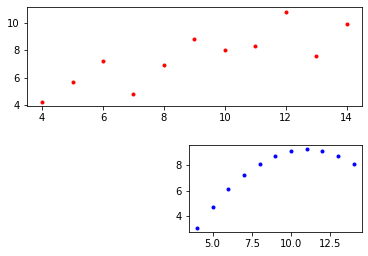

In [34]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)

## Specify location where new axes is drawn
## left, bottom, width, height
ax2 = fig.add_axes([0.5, 0.1, 0.4, 0.3])

## Plot
ax1.plot(df_ans[df_ans.dataset=='I']['x'],
         df_ans[df_ans.dataset=='I']['y'],'r.');
ax2.plot(df_ans[df_ans.dataset=='II']['x'],
df_ans[df_ans.dataset=='II']['y'],'b.');

Below, try to change the third argument for `ax2`. See what happens using the following:

- `ax2 = fig.add_subplot(2,2,4);`
- `ax2 = fig.add_subplot(2,2,2);`
- `ax2 = fig.add_subplot(2,2,3);`



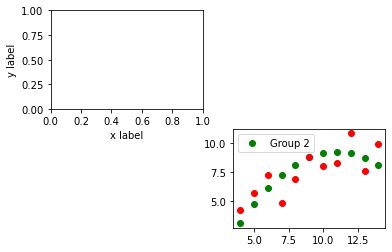

In [35]:
fig = plt.figure();

ax1 = fig.add_subplot(2,2,1);
ax2 = fig.add_subplot(2,2,4);

ax2.scatter(df_ans[df_ans.dataset=='II']['x'],
           df_ans[df_ans.dataset=='II']['y'], c = 'g', label='Group 2');


# Plotting x and y for dataset group I
ax2.scatter(df_ans[df_ans.dataset=='I']['x'],
           df_ans[df_ans.dataset=='I']['y'], c = 'r');
ax2.legend()

ax1.set_xlabel('x label');
ax1.set_ylabel('y label');

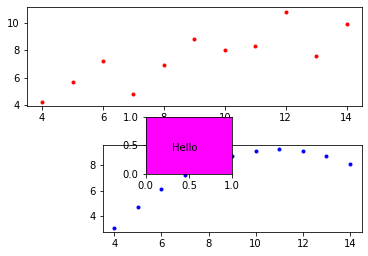

In [36]:
fig = plt.figure()

margs = fig.add_subplot(2,1,1)
margs.plot(df_ans[df_ans.dataset=='I']['x'],
         df_ans[df_ans.dataset=='I']['y'],'r.');

anna = fig.add_axes([0.3, 0.1, 0.6, 0.3])
anna.plot(df_ans[df_ans.dataset=='II']['x'],
         df_ans[df_ans.dataset=='II']['y'],'b.');

ven = fig.add_axes([.4, .3, .2, .2], facecolor='fuchsia');
ven.text(.3,.4, 'Hello');

#### Exercises

Draw a figure with four (4) subplots. Each subplot contains the $x$-$y$ scatter plot for each group in the Anscombe's quartet. Add regression lines in each using the `np.polyfit()` function. In the fourth `Axes` or subplot, add a legend: "Empirical" and "Linear Fit".


`np.polyfit()`  
`fit = np.polyfit(x, y, deg=1)`

##### (1)
<img src="https://user-images.githubusercontent.com/12478436/119073744-6c157f00-ba20-11eb-8c6d-8432bbb92628.png" title="Exercise 1" width=700>

##### (2)
<img src="https://user-images.githubusercontent.com/12478436/119150673-3e145700-ba81-11eb-8673-13a2352189d6.png" width=700 title="Exercise 2">

#### (3)
<img src="https://user-images.githubusercontent.com/12478436/119073736-691a8e80-ba20-11eb-9b40-ce82dbbf8543.png" width=700 title="Exercise 3">

#### (end of exercises)


#### GridSpec
From the documentation, `gridspec` "specifies the geometry of the grid that a subplot will be placed. The number of rows and number of columns of the grid need to be set. Optionally, the subplot layout parameters (e.g., left, right, etc.) can be tuned."



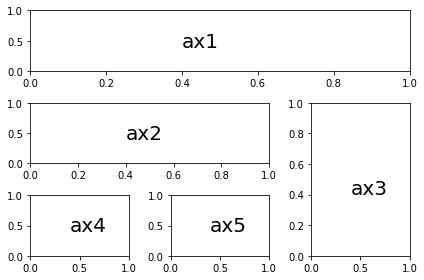

In [37]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(3,3)

ax1 = plt.subplot(gs[0,:])
ax2 = plt.subplot(gs[1, :-1])
ax3 = plt.subplot(gs[1:, -1])
ax4 = plt.subplot(gs[-1, 0])
ax5 = plt.subplot(gs[-1, -2])

ax1.text(0.4, 0.4, "ax1", size=20)
ax2.text(0.4, 0.4, "ax2", size=20)
ax3.text(0.4, 0.4, "ax3", size=20)
ax4.text(0.4, 0.4, "ax4", size=20)
ax5.text(0.4, 0.4, "ax5", size=20)

plt.tight_layout()

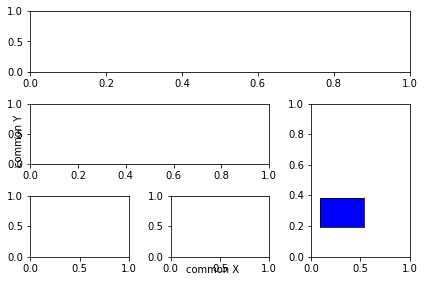

In [38]:
gs = gridspec.GridSpec(3,3)
ax1 = plt.subplot(gs[0,:])
ax2 = plt.subplot(gs[1, :-1])
ax3 = plt.subplot(gs[1:, -1])
ax4 = plt.subplot(gs[-1, 0])
ax5 = plt.subplot(gs[-1, -2])


fig = plt.gcf()
fig.text(0.5, 0.04, 'common X', ha='center');
fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical');
plt.tight_layout()


ax6 = fig.add_axes([.75,.2,.1,.1], facecolor="blue")
ax6.plot()
ax6.set_xticks([]);
ax6.set_yticks([]);

## Other Chart Types
In this section, let's explore other chart types.

In [39]:
doing_sci = pd.DataFrame({'response':['Bored', 'Not Great', 'OK',
                                     'Kind of Interested', 'Excited'],
                         'pre-survey':[11, 5, 40, 25, 19],
                         'post-survey':[12,6, 14, 30, 38]})

In [40]:
doing_sci.head()

,response,pre-survey,post-survey
0,Bored,11,12
1,Not Great,5,6
2,OK,40,14
3,Kind of Interested,25,30
4,Excited,19,38


### Bar plot


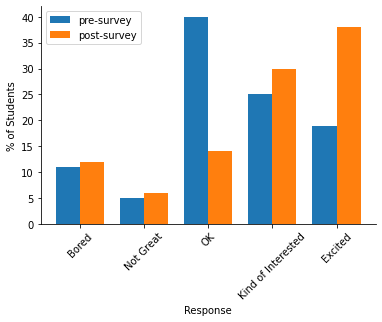

In [41]:
xpos = np.arange(0,10,2)
width = 0.75

plt.bar(xpos, doing_sci['pre-survey'], width=width)
plt.bar(xpos+width, doing_sci['post-survey'], width=width)

plt.ylabel('% of Students')
plt.xlabel('Response')
plt.xticks(xpos + width / 2,
           labels=doing_sci.response.to_list(), rotation=45)
plt.legend(['pre-survey', 'post-survey']);
mike = plt.gca()

mike.spines['top'].set_visible(False)
mike.spines['right'].set_visible(False)
mike.spines['bottom'].set_visible(True)
mike.spines['left'].set_visible(True);

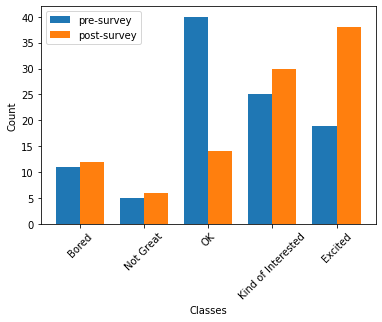

In [42]:
fig, ax = plt.subplots(1)

ax.bar(xpos, doing_sci['pre-survey'], width=width)
ax.bar(xpos+width, doing_sci['post-survey'], width=width)

ax.set_ylabel('Count')
ax.set_xlabel('Classes')
ax.set_xticks(xpos + width / 2)
ax.set_xticklabels(doing_sci.response.to_list(),
                   rotation=45)

ax.legend(['pre-survey', 'post-survey']);

### Pie chart
And of course, our pie chart.

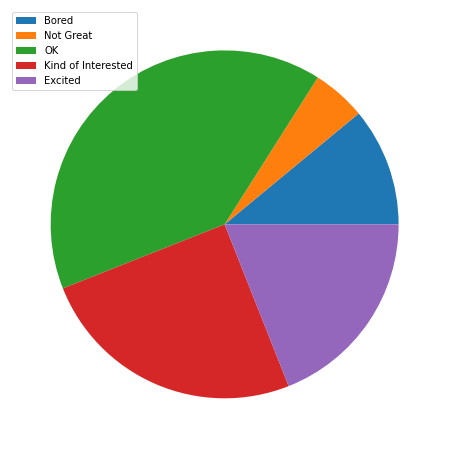

In [43]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
labels = doing_sci.response.to_list()
ax.pie(doing_sci['pre-survey'])
ax.legend(labels);

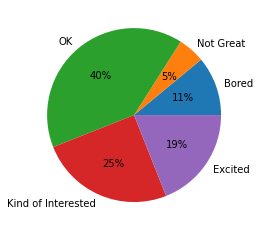

In [44]:
pie = plt.pie(doing_sci['pre-survey'], labels = labels,
       autopct='%1.f%%');

The fonts inside the wedges are printed in black, what if I want them in white font? How may we tweak this figure? We can take a hint by printing out the different components of the figure.

Note that we "stored" the pie chart in the variable `pie`. Let's what's inside `pie` then.

In [45]:
pie

([<matplotlib.patches.Wedge at 0x219af382220>,
 [Text(1.0349688465473768, 0.372611710331805, 'Bored'),
  Text(0.7274430530148199, 0.8251221755718836, 'Not Great'),
  Text(-0.7011664053880502, 0.8475645532673016, 'OK'),
  Text(-0.4368626409454568, -1.0095301050222134, 'Kind of Interested'),
  Text(0.9097886508052714, -0.6182916875277591, 'Excited')],
 [Text(0.5645284617531144, 0.20324275109007545, '11%'),
  Text(0.39678711982626536, 0.45006664122102735, '5%'),
  Text(-0.3824544029389364, 0.46230793814580085, '40%'),
  Text(-0.2382887132429764, -0.5506527845575708, '25%'),
  Text(0.49624835498469344, -0.3372500113787777, '19%')])

Here, we see that `pie` is a tuple. Observe the elements in the tuple above. And connect your observation with the code cell below that prints the data text (or "autotext") in white font.

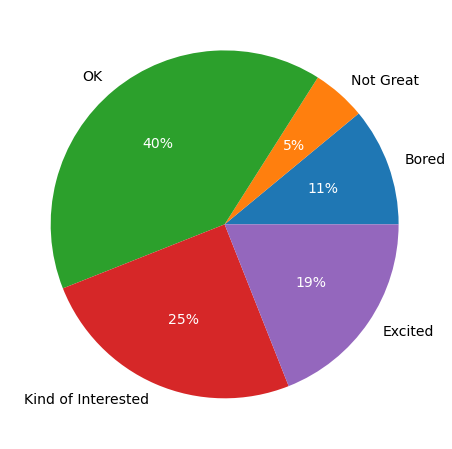

In [46]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
wedges, responses, autotexts = ax.pie(doing_sci['pre-survey'], labels = labels,
       autopct='%1.f%%', textprops=dict(color='k', size=14, ));
for autotext in autotexts:
  autotext.set_color('w');

In [47]:
autotexts

[Text(0.5645284617531144, 0.20324275109007545, '11%'),
 Text(0.39678711982626536, 0.45006664122102735, '5%'),
 Text(-0.3824544029389364, 0.46230793814580085, '40%'),
 Text(-0.2382887132429764, -0.5506527845575708, '25%'),
 Text(0.49624835498469344, -0.3372500113787777, '19%')]

And that is it for your first dive into **matplotlib**'s `pyplot` and object-oriented interfaces. _#End_


---
To **proceed to the next notebook** on Seaborn and Plotly: \[[github](https://github.com/villagraciaa/Data-Viz-Python/blob/main/Intro%20to%20Data%20Viz%20with%20Python%20(Part%20II).ipynb)\]

<table align="left" border=0>
<!-- <table class="tfo-notebook-buttons" align="left"> -->
  <td>
    <a target="_blank" href="https://github.com/eflegara/Data-Viz-Python/blob/main/Intro%20to%20Data%20Viz%20with%20Python%20(Part%20I).ipynb" title="view source on Github"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /></a>
  </td>
</table>

